## Questão 1)

In [1]:
import numpy as np

In [2]:
def euler_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using Euler's method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    t_results = [t0]
    y_results = [y0]
    
    while i < n:
        y0 = y0 + delta * f(t0, y0)

        t0 = t0 + delta
        i += 1

        t_results.append(t0)
        y_results.append(y0)

    return t_results, np.array(y_results)

In [3]:
def func(x,y):
    return 0.04*y

times_e, results_e = euler_method(func, 0, 1000, 1, 1)
print(times_e)
print(results_e)

[0, 1.0]
[1000. 1040.]


In [4]:
def improved_euler_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using improved Euler's method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    t_results = [t0]
    y_results = [y0]
    
    while i < n:
        k1 = delta * f(t0, y0)
        k2 = delta * f(t0 + delta, y0 + k1)
        yn = y0 + 1/2 * (k1 + k2)

        t0 = t0 + delta
        y0 = yn
        i += 1

        t_results.append(t0)
        y_results.append(yn)

    return t_results, np.array(y_results)

In [5]:
def func(x,y):
    return 0.04*y

times_e, results_e = improved_euler_method(func, 0, 1000, 1, 1)
print(times_e)
print(results_e)

[0, 1.0]
[1000.  1040.8]


In [6]:
def runge_kutta_ralston_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using ralston method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    t_results = [t0]
    y_results = [y0]
    
    while i < n:
        k1 = delta* f(t0, y0)
        k2 = delta* f(t0 + delta/2, y0 + k1/2)
        k3 = delta* f(t0 + 3/4*delta, y0 + 3/4*k2)

        yn = y0 + 1/9 * (2*k1 + 3*k2 + 4*k3)

        t0 = t0 + delta
        y0 = yn
        i += 1

        t_results.append(t0)
        y_results.append(yn)

    return t_results, np.array(y_results)

In [7]:
def func(x,y):
    return 0.04*y

times_r, results_r = runge_kutta_ralston_method(func, 0, 1000, 1, 1)
print(times_r)
print(results_r)

[0, 1.0]
[1000.         1040.81066667]


In [8]:
def runge_kutta_classic_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using runge kutta classic method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    t_results = [t0]
    y_results = [y0]
    
    while i < n:
        k1 = delta * f(t0, y0)
        k2 = delta * f(t0 + delta/2, y0 + k1/2)
        k3 = delta * f(t0 + delta/2, y0 + k2/2)
        k4 = delta * f(t0 + delta, y0 + k3)

        yn = y0 + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

        t0 = t0 + delta
        y0 = yn
        i += 1

        t_results.append(t0)
        y_results.append(yn)

    return t_results, np.array(y_results)

In [9]:
def func(x,y):
    return 0.04*y

times_r, results_r = runge_kutta_classic_method(func, 0, 1000, 1, 1)
print(times_r)
print(results_r)

[0, 1.0]
[1000.         1040.81077333]


## Questão 2

### Letra a)

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Sistema SI com evolução demográfica
def si_model(mi, betha):
    def f(t, y):
        S, I = y
        N = S + I
        ds = mi * N - betha * S * I / N - mi * S
        di = betha * S * I / N - mi * I
        return np.array([ds, di])
    return f

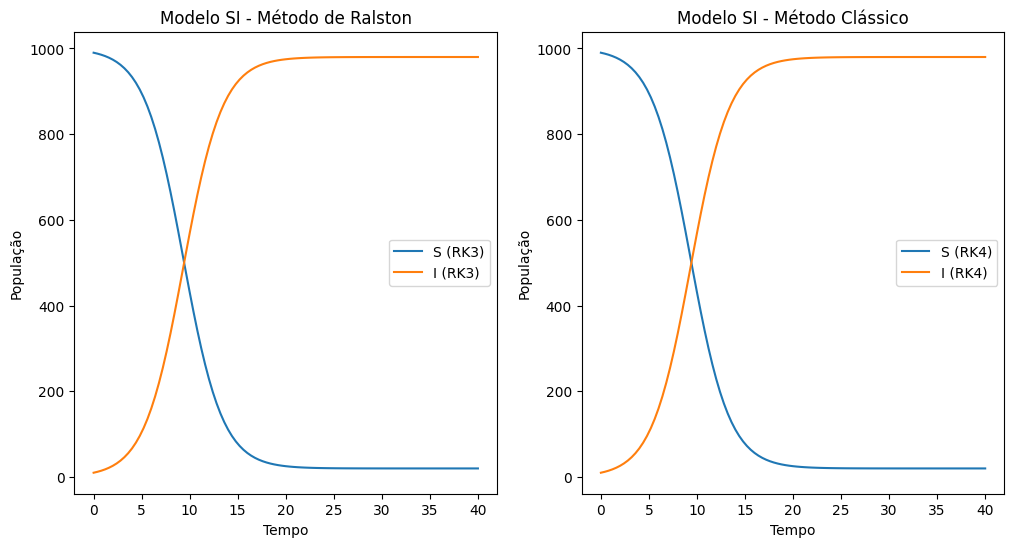

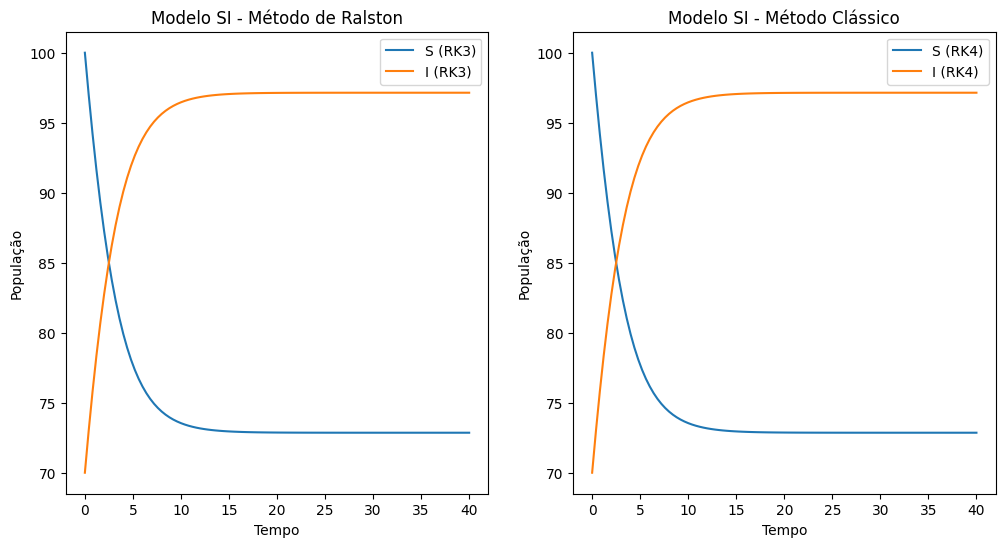

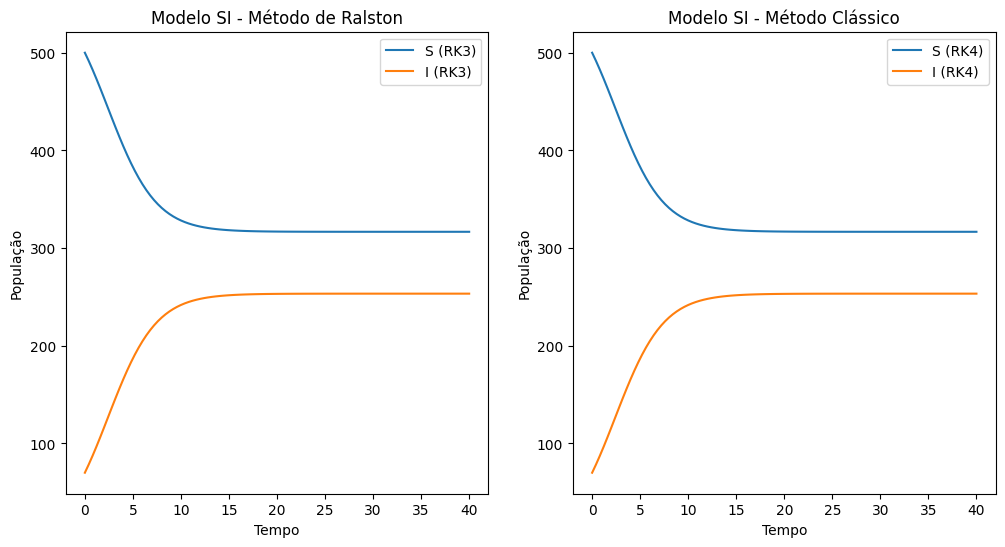

In [12]:
states = [
    [0.01, 0.5, [990, 10]], 
    [0.3, 0.7, [100, 70]], 
    [0.5, 0.9, [500, 70]]
]
for mi, betha, y0 in states:
    f = si_model(mi, betha)
    times_r, results_r = runge_kutta_ralston_method(f, 0, y0, 40, 100)
    times_c, results_c = runge_kutta_classic_method(f, 0, y0, 40, 100)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(times_r, results_r[:, 0], label='S (RK3)')
    plt.plot(times_r, results_r[:, 1], label='I (RK3)')
    plt.title('Modelo SI - Método de Ralston')
    plt.xlabel('Tempo')
    plt.ylabel('População')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(times_c, results_c[:, 0], label='S (RK4)')
    plt.plot(times_c, results_c[:, 1], label='I (RK4)')
    plt.title('Modelo SI - Método Clássico')
    plt.xlabel('Tempo')
    plt.ylabel('População')
    plt.legend()

### Letra b)

In [13]:
steps = np.arange(200, 1000, 10)
errors = []
for step in steps:
    times_r, results_r = runge_kutta_ralston_method(f, 0, np.array([100, 70]), 40, step)
    times_c, results_c = runge_kutta_classic_method(f, 0, np.array([100, 70]), 40, step)

    error = np.abs(results_r - results_c).mean()
    errors.append(error)

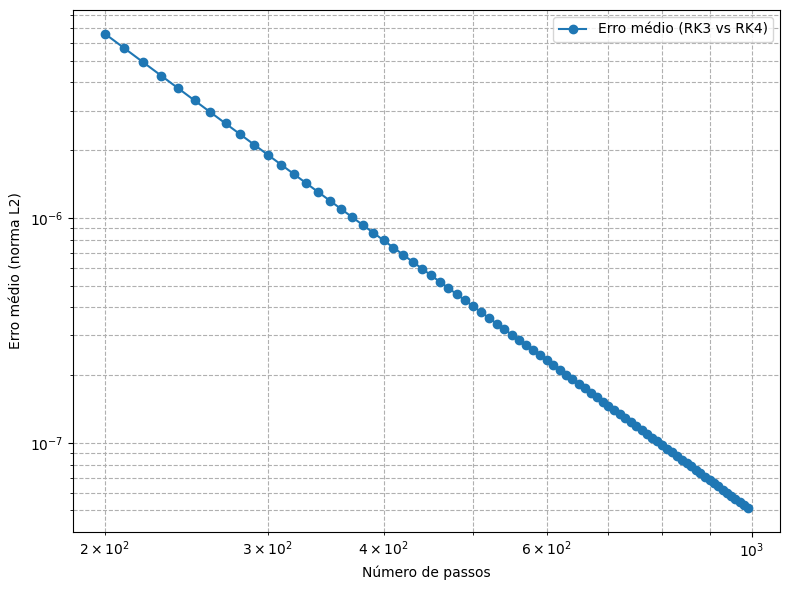

In [14]:
plt.figure(figsize=(8, 6))
plt.loglog(steps, errors, 'o-', label='Erro médio (RK3 vs RK4)')
plt.xlabel('Número de passos')
plt.ylabel('Erro médio (norma L2)')
plt.grid(True, which="both", linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

## Questão 3)

In [15]:
def lorenz_model(sigma, b, r):
    def f(t, xyz):
        x, y, z = xyz
        dx = -sigma*x + sigma*y
        dy = r*x - y - x*z
        dz = -b*z + x*y

        return np.array([dx, dy, dz])
    return f

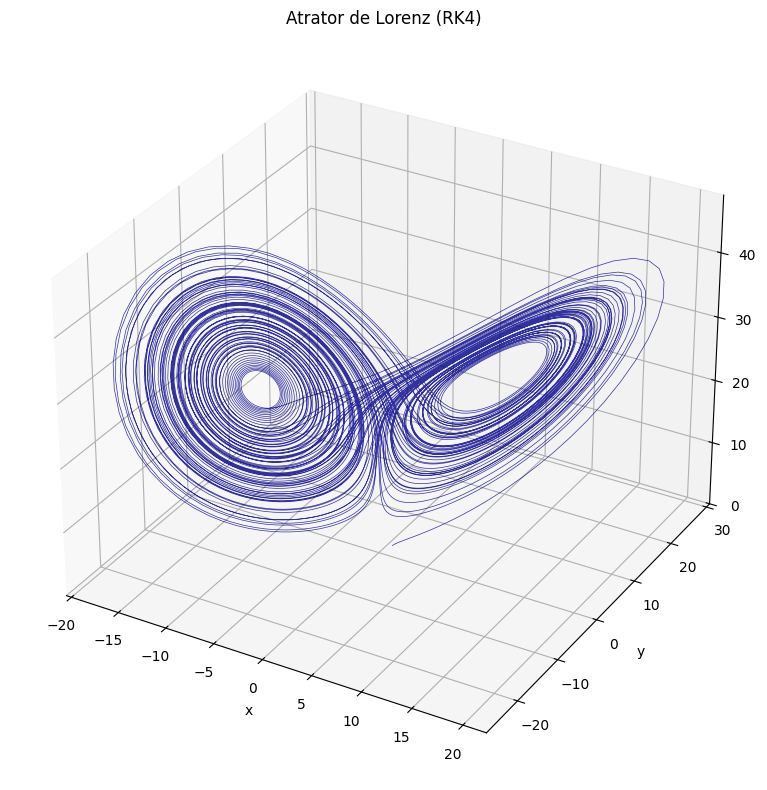

In [16]:
f = lorenz_model(10, 8/3, 28)
# times_r, results_r = runge_kutta_ralston_method(f, 0, y0, 1000, 10)
times_c, results_c = runge_kutta_classic_method(f, 0, np.array([1.0, 1.0, 1.0]), 100, 10_000)

dx_sol = results_c[:, 0]
dy_sol = results_c[:, 1]
dz_sol = results_c[:, 2]

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(dx_sol, dy_sol, dz_sol, lw=0.5, color='darkblue', alpha=0.8)
ax.set_title('Atrator de Lorenz (RK4)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Automatically scale axes tightly to the data
# dx_range = dx_sol.max() - dx_sol.min()
# dy_range = dy_sol.max() - dy_sol.min()
# dz_range = dz_sol.max() - dz_sol.min()
# max_range = np.array([dx_range, dy_range, dz_range]).max() / 2.0

# mid_x = (results_c[:, 0].max()+results_c[:, 0].min()) * 0.5
# mid_y = (results_c[:, 1].max()+results_c[:, 1].min()) * 0.5
# mid_z = (results_c[:, 2].max()+results_c[:, 2].min()) * 0.5
# ax.set_xlim(dx_sol.min(), dx_sol.max())
# ax.set_ylim(dy_sol.min(), dy_sol.max())
# ax.set_zlim(dz_sol.min(), dz_sol.max())

plt.tight_layout()
plt.show()